# Klasifikace

### MNIST dataset

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784", version=1)

Datasety načtené skrz sklearn používají datové struktury podobné slovníkům

In [2]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
mnist["DESCR"]

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

### Prozkoumáme data

In [4]:
type(mnist["data"])

pandas.core.frame.DataFrame

In [5]:
mnist["data"].head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
mnist["data"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 784 entries, pixel1 to pixel784
dtypes: float64(784)
memory usage: 418.7 MB


In [7]:
mnist["data"].describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.197414,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.991206,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


**Prozkoumáme konkrétní instance**

Dále budeme pracovat s NumPy poli

In [8]:
import numpy as np

In [9]:
X, y = mnist["data"].to_numpy(), mnist["target"].to_numpy()

In [10]:
X.shape

(70000, 784)

In [11]:
y.shape

(70000,)

In [12]:
import matplotlib
import matplotlib.pyplot as plt

Stačí nám převést instanci na tvar (28,28) a nechat zobrazit

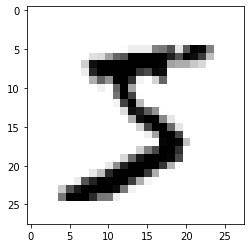

In [13]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary)

In [14]:
some_digit_image[18,18]

253.0

In [15]:
y[0]

'5'

Pokud bychom chtěli labely převést na čísla:

In [16]:
y = y.astype(np.uint8)

In [17]:
y[0]

5

Větší část z datasetu k nahlédnutí viz prezentace

### Rozdělení dat na trénovací a testovací

In [18]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

(v tomto datasetu jsou data už náhodně promíchaná, takže můžeme rozdělit i jen takto jednoduše)

### Binární klasifikátor

Viz prezentace.

Natrénujeme klasifikátor, který poznává pětky a "ne-pětky"

In [19]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [20]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [21]:
sgd_clf.predict([some_digit])

array([ True])

### Metriky úspěchu

Viz prezentace

In [22]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

In [23]:
scores.mean()

0.9570333333333334

Více než 95% správnost vypadá perfektně, ale jen na první pohled. 

Podívejme se, jakou správnost bude mít klasifikátor, který bude pořád predikovat jednu a tu samou třídu.

In [24]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [25]:
never5_clf = Never5Classifier()
scores = cross_val_score(never5_clf, X_train, y_train_5, cv=3, scoring="accuracy")
scores.mean()

0.90965

Více než 90% správnost u tohoto klasifikátoru je daná tím, že pouze 10 % z datasetu jsou pětky, takže když budeme predikovat, že hodnota není pětka, měli bychom se dostat k 90 %. V porovnání s touto hodnotou již 95 % u SGD klasifikátoru nevypadá tak dobře.

### Matice záměn

Použijeme matici záměn (confusion matrix), viz prezentace

In [26]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

**Každý řádek matice představuje aktuální třídu, každý sloupec pak predikovanou třídu**

In [28]:
[['true negative', 'false positive'], 
 ['false negative', 'true positive']]

[['true negative', 'false positive'], ['false negative', 'true positive']]

In [29]:
y_train_perfect_pred = y_train_5
confusion_matrix(y_train_5, y_train_perfect_pred)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

### Přesnost a úplnost

Viz prezentace

In [30]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [31]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

Teď výsledky vypadají o poznání hůř než v případě accuracy - když instanci označí za pětku, tak je to správně jen v 84 % případů. A odhalí jen 65 % pětek.

### F1 skóre

Viz prezentace

In [32]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

### Precision/Recall Tradeoff

Threshold nejde nastavit přímo, ale můžeme získat hodnoty skóre pro každou instanci  

In [33]:
y_scores = sgd_clf.decision_function([some_digit])

In [34]:
y_scores

array([2164.22030239])

In [35]:
threshold = 0
y_predictions = (y_scores > threshold)

In [36]:
y_predictions

array([ True])

Můžeme si nechat zobrazit křivky Precision a Recall pro možné prahové hodnoty 

In [37]:
from sklearn.metrics import precision_recall_curve

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, 
                             method="decision_function")

In [38]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

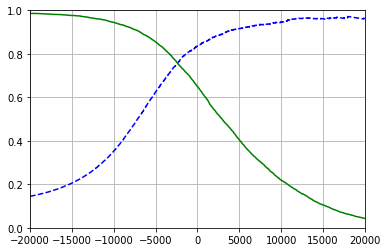

In [39]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.axis([-20000,20000, 0, 1])
plt.grid(True)

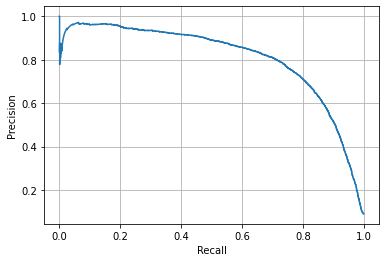

In [40]:
plt.plot(recalls, precisions)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)

Pokud bychom si chtěli zvolit práh např. pro 90 % precision:

In [41]:
threshold_p90 = thresholds[np.argmax(precisions >= 0.9)]

In [42]:
y_train_p90 = (y_scores >= threshold_p90)

In [43]:
precision_score(y_train_5, y_train_p90)

0.9000345901072293

In [44]:
recall_score(y_train_5, y_train_p90)

0.4799852425751706

Vidíme, že lze dosáhnout téměř libovolné přesnosti, ale za cenu nízké úplnosti.

### ROC křivka

Viz prezentace

In [45]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

Text(0, 0.5, 'TPR (Recall)')

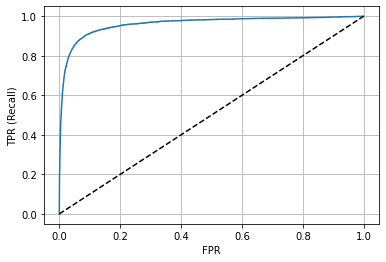

In [46]:
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--') # diagonála
plt.grid(True)
plt.xlabel("FPR")
plt.ylabel("TPR (Recall)")

Porovnat klasifikátory lze tak, že se spočte a porovná plocha pod křivkou (čím větší, tím lepší) - ROC AUC

In [47]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

### Random Forest klasifikátor

Random Forest nemá funkci decision_function(), ale místo ní má predict_proba()

In [48]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, 
                                    method="predict_proba")

Porovnáme F1 skóre oproti SGD klasifikátoru (SGD = 0.73)

In [49]:
y_preds_forest = y_probas_forest > 0.5
y_preds_forest = y_preds_forest[:, 1]

f1_score(y_train_5, y_preds_forest)

0.9242275142688446

Porovnáme ROC. K tomu ale potřebujeme score, ne pravděpodobnosti obou tříd. Proto vezmeme druhý sloupec, kde jsou pravděpodobnosti pro pozitivní třídu a tuto hodnotu použijeme jako score.

In [50]:
y_scores_forest = y_probas_forest[:, 1]

fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, 
                                                      y_scores_forest)

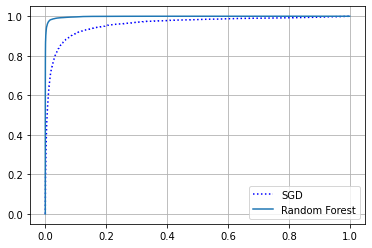

In [51]:
plt.plot(fpr, tpr, "b:", label="SGD")
plt.plot(fpr_forest, tpr_forest, label="Random Forest")
plt.grid(True)
plt.legend()

In [52]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

## Klasifikace do více tříd

Viz prezentace

Scikit-Learn pozná, že se snažíme použít binární klasifikátor pro více tříd, a automaticky spustí OvA variantu (resp. OvO v případě SVM)

In [53]:
X_train_small = X_train[:10000]
y_train_small = y_train[:10000]

In [54]:
sgd_clf.fit(X_train_small, y_train_small)

SGDClassifier(random_state=42)

In [55]:
sgd_clf.predict([some_digit])

array([5], dtype=uint8)

In [56]:
sgd_clf.decision_function([some_digit])

array([[-353933.70144081, -456278.52453021, -118803.17830956,
          -9739.18440026, -380798.71504636,   37722.36441629,
        -361783.77920629, -252474.49554937, -142313.41302712,
        -199056.44166569]])

In [57]:
cross_val_score(sgd_clf, X_train_small, y_train_small, cv=3, scoring='accuracy')

array([0.86592681, 0.86978698, 0.85448545])

Natrénujeme ještě Random Forest

In [58]:
forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [59]:
forest_clf.predict([some_digit])

array([5], dtype=uint8)

In [60]:
forest_clf.predict_proba([some_digit])

array([[0.  , 0.  , 0.01, 0.08, 0.  , 0.9 , 0.  , 0.  , 0.  , 0.01]])

In [61]:
cross_val_score(forest_clf, X_train_small, y_train_small, cv=3, scoring='accuracy')

array([0.94181164, 0.94719472, 0.93459346])

Pro modely využívající Stochastic Gradient Descent je vhodné hodnoty škálovat 

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_small_scaled = scaler.fit_transform(X_train_small.astype(np.float64))

In [63]:
cross_val_score(sgd_clf, X_train_small_scaled, y_train_small, cv=3, scoring='accuracy')

array([0.8920216 , 0.91029103, 0.88778878])

Vidíme, že jednoduché škálování hodnot přineslo vcelku viditelné zlepšení pro SGD

Porovnáme ještě pro Random Forest

In [64]:
cross_val_score(forest_clf, X_train_small_scaled, y_train_small, cv=3, scoring='accuracy')

array([0.94211158, 0.94749475, 0.93519352])

Vidíme, že pro Random Forest žádné zlepšení, rozhodovací stromy nejsou na škálování hodnot citlivé

### Analýza chyb při multiclass klasifikaci

Začneme maticí záměn

In [65]:
y_train_small_pred = cross_val_predict(sgd_clf, X_train_small_scaled,
                                       y_train_small, cv=3)

In [66]:
conf_mx = confusion_matrix(y_train_small, y_train_small_pred)
conf_mx

array([[ 961,    0,    4,    3,    2,   16,    6,    2,    7,    0],
       [   0, 1073,   10,    4,    1,   14,    0,    2,   22,    1],
       [   9,   16,  863,   13,    9,    7,   15,   11,   43,    5],
       [   8,   11,   26,  882,    0,   43,    4,   17,   25,   16],
       [   3,    4,   11,    5,  876,    5,   10,    9,   18,   39],
       [   7,    4,    9,   37,   17,  716,   15,    1,   46,   11],
       [  11,    4,   11,    0,    8,   16,  942,    2,   19,    1],
       [   5,    2,   12,   10,   10,    1,    1,  958,    8,   63],
       [   8,   16,   23,   16,    2,   18,   14,    4,  837,    6],
       [   7,    7,    9,   19,   24,    4,    0,   29,   20,  859]],
      dtype=int64)

Vizualizujeme si ji

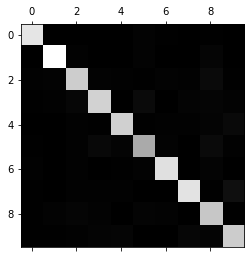

In [67]:
plt.matshow(conf_mx, cmap=plt.cm.gray)

Není to špatné - světlé body jsou na hlavní diagonále, což značí, že třídy jsou klasifikovány vesměs správně. 

Abychom viděli více dovnitř, potřebujeme se diagonály zbavit a ještě jednotlivé řádky znormalizovat, aby byly vzájemně porovnatelné

In [68]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

In [69]:
np.fill_diagonal(norm_conf_mx, 0)

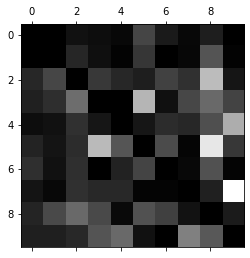

In [70]:
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)

- Vidíme, že řada číslic je zaměňována za osmičku, hlavně pětka
- Samotná osmička je ale dobrá  => není to nutně symetrické
- Pro zlepšení klasifikátoru musíme zlepšit hlavně chybnou klasifikaci za osmičku

Jak na to:
- Získat víc trénovacích dat pro číslice, které vypadají  jako osmička ale nejsou osmička
- Získat nové features, např. vypočítávat počet uzavřených smyček v obrázku a přikládat ho jako další feature
- Preprocessing obrázků, aby některé vzory vynikly více (scikit-image, pillow, opencv)

SGD klasifikátor je velmi jednoduchý lineární model, který každému pixelu přiřazuje váhu pro každou ze tříd. Pak jen sečte vážené intenzity pixelů a získá skóre pro třídu. 3 a 5 se liší jen o pár pixelů, takže je často zaměňuje.


Můžeme porovnat ještě s Random Forest

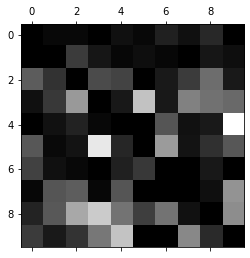

In [71]:
y_train_small_pred = cross_val_predict(forest_clf, X_train_small_scaled,
                                       y_train_small, cv=3)
conf_mx = confusion_matrix(y_train_small, y_train_small_pred)
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)

### Data Augmentation


Pokud máme trénovacích dat málo, může často pomoci si umělě vytvořit další testovací příklady vzniklé modifikací dat, které máme. V případě obrázků se dá použít např. posun obrázků nebo rotace. Zde si vyzkoušíme posun obrázku v různých směrech a podíváme se, zda se zlepšily výsledky klasifikace.

In [72]:
from scipy.ndimage.interpolation import shift

In [73]:
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

In [74]:
image = X_train[0]

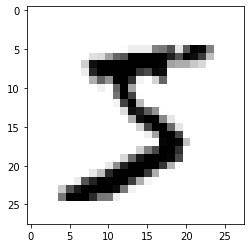

In [75]:
plt.imshow(image.reshape(28,28), cmap=matplotlib.cm.binary)

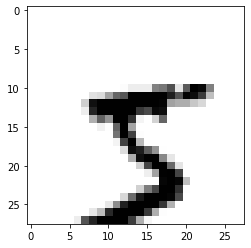

In [76]:
plt.imshow(shift_image(image, 0, 5).reshape(28,28), cmap=matplotlib.cm.binary)

In [84]:
X_train_small_augmented = X_train_small.tolist()
y_train_small_augmented = y_train_small.tolist()

In [85]:
for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train_small, y_train_small):
        X_train_small_augmented.append(shift_image(image, dx, dy))
        y_train_small_augmented.append(label)

X_train_small_augmented = np.array(X_train_small_augmented)
y_train_small_augmented = np.array(y_train_small_augmented)

In [89]:
shuffle_idx = np.random.permutation(len(X_train_small_augmented))
X_train_small_augmented = X_train_small_augmented[shuffle_idx]
y_train_small_augmented = y_train_small_augmented[shuffle_idx]

In [90]:
X_train_small_augmented.shape

(50000, 784)

Ověříme na SGDClassifier
(trvá to velmi dlouho)

In [79]:
# cross_val_score(sgd_clf, X_train_small_augmented, y_train_small_augmented, cv=3, scoring='accuracy')

A na Random Forest

In [91]:
cross_val_score(forest_clf, X_train_small_augmented, y_train_small_augmented, cv=3, scoring='accuracy')

array([0.96130077, 0.96280074, 0.96375855])